In [16]:
import xgboost as xgb
from xgboost import plot_importance

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import matplotlib as plt
%matplotlib inline

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
print(xgb.__version__)

1.3.3


### Python wrapper ###

In [ ]:
# Loading dataset
data = load_breast_cancer()
features = data.data
label = data.target

cancer_df = pd.DataFrame(data=features, columns=data.feature_names)
cancer_df['target'] = label
cancer_df.head()

In [7]:
print(data.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [9]:
#Change to DMatrix  from learning and predict dataset

d_train = xgb.DMatrix(data=X_train, label=y_train)
d_test = xgb.DMatrix(data=X_test, label=y_test)

In [10]:
#Setup hyper parameters
params = {
    'max_depth':3,
   'eta': 0.1,
   'objective':'binary:logistic',
   'eval_metric':'logloss',
   'early_stoppings':100
}

num_rounds = 400

In [11]:
w_list = [(d_train,'train'), (d_test,'eval')]
xgb_model = xgb.train(params=params, dtrain=d_train, num_boost_round=num_rounds, evals=w_list)

[23:29:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.61144	eval-logloss:0.61742
[1]	train-logloss:0.54412	eval-logloss:0.55438
[2]	train-logloss:0.48730	eval-logloss:0.50211
[3]	train-logloss:0.43707	eval-logloss:0.45572
[4]	train-logloss:0.39449	eval-logloss:0.41655
[5]	train-logloss:0.35647	eval-logloss:0.37972
[6]	train-logloss:0.32355	eval-logloss:0.34839
[7]	train-logloss:0.29502	eval-logloss:0.32417
[8]	train-logloss:0.27017	eval-logloss:0.29974
[9]	train-logloss:0.24757	eval-logloss:0.27925
[10]	train-logloss:0.22806	eval-logloss:0.26083
[11]	train-logloss:0.20966	eval-logloss:0.24801
[12]	train-logloss:0.19303	eval-logloss:0

In [12]:
pred_prob = xgb_model.predict(d_test)
print(np.round(pred_prob[:10],3))

pred = [ 1 if x > 0.5 else 0 for x in pred_prob ]
print(pred[:10])


[0.976 1.    0.609 0.    0.    0.999 0.    1.    0.    0.8  ]
[1, 1, 1, 0, 0, 1, 0, 1, 0, 1]


In [13]:
def get_clf_eval(y_test, pred=None, pred_prob=None) :
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_prob)
    print('matrix')
    print(confusion)
    print('Accuracy : {0}, Precision : {1}, Recall : {2}, f1 : {3}, AUC : {4}'.format(accuracy,precision,recall,f1,roc_auc))

In [14]:
get_clf_eval(y_test, pred, pred_prob)

matrix
[[45  3]
 [ 0 66]]
Accuracy : 0.9736842105263158, Precision : 0.9565217391304348, Recall : 1.0, f1 : 0.9777777777777777, AUC : 0.9889520202020202


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

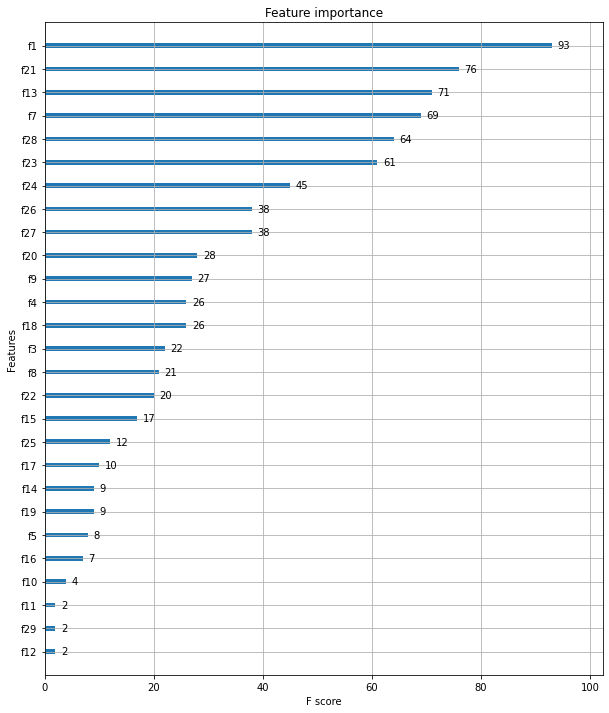

In [19]:
#Visualization of feature importance
figure, ax = plt.pyplot.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

### sklearn wrapper ###

In [22]:
from xgboost import XGBClassifier

evals = [(X_test, y_test)]

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train , y_train,  early_stopping_rounds=400,eval_set=evals, eval_metric="logloss",  verbose=True)

wrapper_pred = xgb_wrapper.predict(X_test)
wrapper_pred_prob = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61742
[1]	validation_0-logloss:0.55438
[2]	validation_0-logloss:0.50211
[3]	validation_0-logloss:0.45572
[4]	validation_0-logloss:0.41655
[5]	validation_0-logloss:0.37972
[6]	validation_0-logloss:0.34839
[7]	validation_0-logloss:0.32417
[8]	validation_0-logloss:0.29974
[9]	validation_0-logloss:0.27925
[10]	validation_0-logloss:0.26083
[11]	validation_0-logloss:0.24801
[12]	validation_0-logloss:0.23284
[13]	validation_0-logloss:0.22007
[14]	validation_0-logloss:0.20975
[15]	validation_0-logloss:0.19939
[16]	validation_0-logloss:0.18869
[17]	validation_0-logloss:0.18097
[18]	validation_0-logloss:0.17236
[19]	validation_0-logloss:0.16496
[20]	validation_0-logloss:0.15761
[21]	validation_0-logloss:0.15097
[22]	validation_0-logloss:0.14484
[23]	validation_0-logloss:0.14000
[24]	validation_0-logloss:0.13498
[25]	validation_0-logloss:0.13150
[26]	validation_0-logloss:0.12951
[27]	validation_0-logloss:0.12627
[28]	validation_0-logloss:0.12491
[29]	validation_0-loglos

In [23]:
get_clf_eval(y_test, wrapper_pred, wrapper_pred_prob)

matrix
[[45  3]
 [ 0 66]]
Accuracy : 0.9736842105263158, Precision : 0.9565217391304348, Recall : 1.0, f1 : 0.9777777777777777, AUC : 0.992739898989899


In [24]:
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
                eval_set=evals, verbose=True)

wrapper_pred = xgb_wrapper.predict(X_test)
wrapper_pred_prob = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61742
[1]	validation_0-logloss:0.55438
[2]	validation_0-logloss:0.50211
[3]	validation_0-logloss:0.45572
[4]	validation_0-logloss:0.41655
[5]	validation_0-logloss:0.37972
[6]	validation_0-logloss:0.34839
[7]	validation_0-logloss:0.32417
[8]	validation_0-logloss:0.29974
[9]	validation_0-logloss:0.27925
[10]	validation_0-logloss:0.26083
[11]	validation_0-logloss:0.24801
[12]	validation_0-logloss:0.23284
[13]	validation_0-logloss:0.22007
[14]	validation_0-logloss:0.20975
[15]	validation_0-logloss:0.19939
[16]	validation_0-logloss:0.18869
[17]	validation_0-logloss:0.18097
[18]	validation_0-logloss:0.17236
[19]	validation_0-logloss:0.16496
[20]	validation_0-logloss:0.15761
[21]	validation_0-logloss:0.15097
[22]	validation_0-logloss:0.14484
[23]	validation_0-logloss:0.14000
[24]	validation_0-logloss:0.13498
[25]	validation_0-logloss:0.13150
[26]	validation_0-logloss:0.12951
[27]	validation_0-logloss:0.12627
[28]	validation_0-logloss:0.12491
[29]	validation_0-loglos

In [25]:
get_clf_eval(y_test, wrapper_pred, wrapper_pred_prob)

matrix
[[45  3]
 [ 0 66]]
Accuracy : 0.9736842105263158, Precision : 0.9565217391304348, Recall : 1.0, f1 : 0.9777777777777777, AUC : 0.992739898989899


In [26]:
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10,
                eval_metric="logloss", eval_set=evals,verbose=True)

wrapper_pred = xgb_wrapper.predict(X_test)
wrapper_pred_prob = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61742
[1]	validation_0-logloss:0.55438
[2]	validation_0-logloss:0.50211
[3]	validation_0-logloss:0.45572
[4]	validation_0-logloss:0.41655
[5]	validation_0-logloss:0.37972
[6]	validation_0-logloss:0.34839
[7]	validation_0-logloss:0.32417
[8]	validation_0-logloss:0.29974
[9]	validation_0-logloss:0.27925
[10]	validation_0-logloss:0.26083
[11]	validation_0-logloss:0.24801
[12]	validation_0-logloss:0.23284
[13]	validation_0-logloss:0.22007
[14]	validation_0-logloss:0.20975
[15]	validation_0-logloss:0.19939
[16]	validation_0-logloss:0.18869
[17]	validation_0-logloss:0.18097
[18]	validation_0-logloss:0.17236
[19]	validation_0-logloss:0.16496
[20]	validation_0-logloss:0.15761
[21]	validation_0-logloss:0.15097
[22]	validation_0-logloss:0.14484
[23]	validation_0-logloss:0.14000
[24]	validation_0-logloss:0.13498
[25]	validation_0-logloss:0.13150
[26]	validation_0-logloss:0.12951
[27]	validation_0-logloss:0.12627
[28]	validation_0-logloss:0.12491
[29]	validation_0-loglos

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

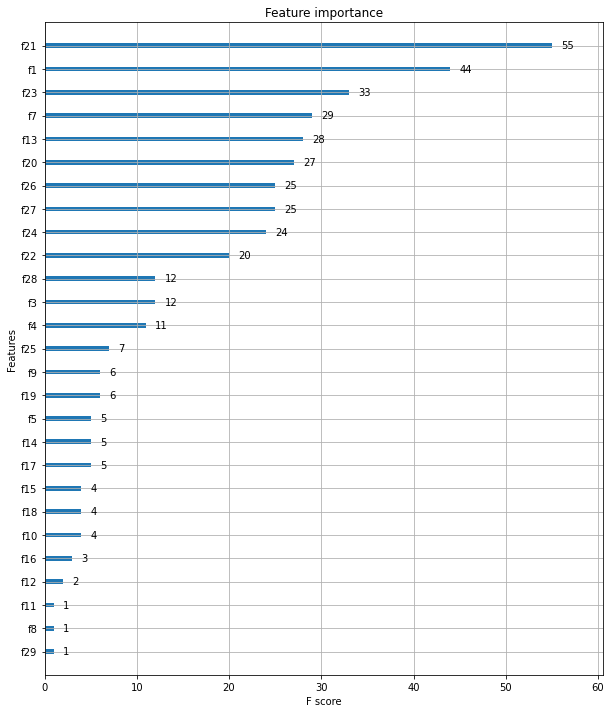

In [27]:
figure,ax = plt.pyplot.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)
